### 3.1.1 Estimating the Coefficients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from typing import Dict, List, Tuple
from numpy import ndarray

In [2]:
data_path = os.getcwd() + '/data'

In [3]:
sales = pd.read_csv(data_path + '/Advertising.csv')

In [4]:
cols = sales.columns.values
cols = cols[1:]

In [5]:
sales = sales[cols]

Text(0, 0.5, 'Sales')

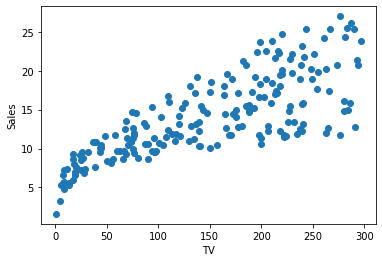

In [6]:
plt.scatter(sales['TV'], sales['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

Let `y(hat)i = θ0 + θ1xi` be the prediction for Y based on the i-th value of X. Then `ei = yi - y(hat)i` represents the i-th *residual* - this is the difference between the i-th observed response value and the i-th response value that is predicted by our linear model.

In [7]:
# Helper function
def init_weights(n_in: int) -> Dict[str, ndarray]:
    
    weights: Dict[str, ndarray] = {}
    weights['W'] = np.random.randn(n_in, 1)
    weights['B'] = np.random.randn(1,1)
    return weights

In [30]:
# Least squares coefficient estimates for simple linear regression y = theta0 + theta1X
def LS_coef_estimates(x: ndarray, y: ndarray) -> Dict[str, ndarray]:
    
    coefs: Dict[str, ndarray] = {}
    theta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.power(x - np.mean(x),2))
    theta_0 = np.mean(y) - theta_1 * np.mean(x)
    
    coefs['theta0'] = theta_0
    coefs['theta1'] = theta_1
    
    return coefs

Let's see if the LS_coef_estimates works as intended. We want to fit the simple linear regression on the TV advertising, i.e. `sales ~ theta_0 + theta_1 * TV`

In [31]:
params = LS_coef_estimates(sales['TV'], sales['sales'])
params

{'theta0': 7.0325935491276965, 'theta1': 0.047536640433019736}

In [55]:
np.arange(0.04, 0.09, 0.01)

array([0.04, 0.05, 0.06, 0.07, 0.08])

(5, 9)

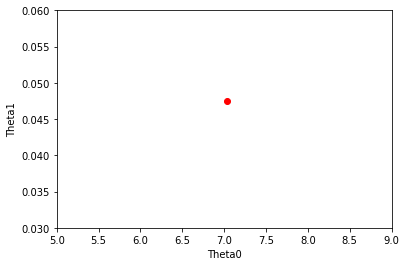

In [64]:
plt.scatter(params['theta0'], params['theta1'], color = 'r')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.ylim(0.03, 0.06)
plt.xlim(5, 9)

In [32]:
def simple_linreg(x: ndarray, coefs: Dict[str, ndarray]) -> ndarray:
    prediction = coefs['theta0'] + coefs['theta1'] * x
    return prediction

In [80]:
def RSS(x: ndarray, 
        coefs: Dict[str, ndarray], 
        y: ndarray) -> ndarray:
    
    prediction = simple_linreg(x, coefs)
    residuals = y - prediction
    
    residual_sum_of_squares = np.sum(np.power(residuals, 2))
    
    return residual_sum_of_squares

In [82]:
RSS(sales['TV'], params, sales['sales'])

2102.5305831313512

In [33]:
linreg = simple_linreg(sales['TV'], params)

In [35]:
linreg

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

In [36]:
X_preds = [x for x in range(300)]
X_preds = np.array(X_preds).reshape(-1,1)

In [37]:
vanilla_linreg = simple_linreg(X_preds, params)

Text(0, 0.5, 'Sales')

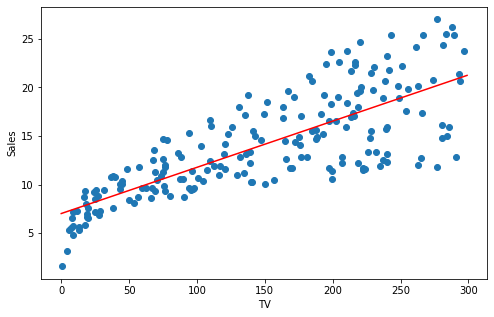

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(sales['TV'], sales['sales'])
plt.plot(vanilla_linreg, color = 'r')
plt.xlabel('TV')
plt.ylabel('Sales')

According to this approximation, an **additional $1000 spend on TV advertising is associated with selling approximately 47.5 additional units of the product.**

### Sklearn implementation (to be used in comparison with the 'vanilla' approach coded above)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linreg = LinearRegression()

In [85]:
X = np.array(sales['TV']).reshape(-1,1)
y = np.array(sales['sales']).reshape(-1,1)

In [86]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
np.sum(np.power(y - linreg.predict(X), 2))

2102.5305831313512

In [91]:
linreg.singular_

array([1211.12304443])

In [92]:
linreg.predict(X)

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [93]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [19]:
X_to_pred = [x for x in range(300)]
X_to_pred = np.array(X_to_pred).reshape(-1,1)

In [20]:
preds=linreg.predict(X_to_pred)

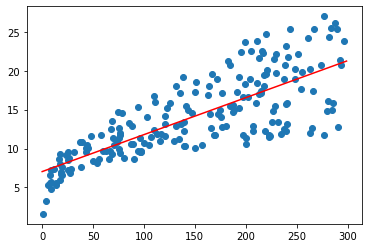

In [21]:
plt.scatter(sales['TV'], sales['sales'])
plt.plot(preds, 'r')

## 3.1.2 Assessing the Accuracy of the Coefficient Estimates

In [265]:
x = np.random.random(100)
y = 2 + (3 * x) + np.random.randn(100)

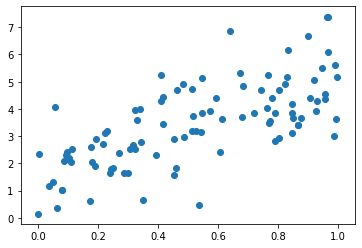

In [266]:
plt.scatter(x,y)